<a href="https://colab.research.google.com/github/sashavlasits/Data-Science/blob/main/Unit4/SashVlasU4proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "preliz[full,notebook]"

In [ ]:
!pip install arviz
!pip install pymc
import pandas as pd
import preliz as pz
import arviz as az
import graphviz as gv
import pymc as pm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

##Context

The Olympics are a multinational, multidisciplinary, multilingual, multi-billion-dollar, multifarious, quadrennial sporting event. This analysis will focus on all of the athletes from all of the olympic games ever (or at least a sample of them). I will categorize the athletes based on the sport that they are competing in, and see how this designation informs player height (measured in cm throughout the analysis). This is a significant analysis for people who feel self concious about their height and want to find the Olympic sport that will be best for them.

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
file_path = '/content/drive/MyDrive/athlete_events.csv'
athlete_databad = pd.read_csv(file_path)

In [36]:
athlete_databad.dropna(inplace=True)
athlete_databad

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [37]:
##ai helped me
athlete_datayay = athlete_databad.sample(n=2000)

athlete_datayay

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
133982,67461,Maciej Piotr asicki,M,26.0,192.0,96.0,Poland,POL,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxed Fours,Bronze
254690,127501,Mikhail Yakovlevich Voronin,M,23.0,170.0,65.0,Soviet Union,URS,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Men's Horizontal Bar,Gold
256697,128533,Wang Mingxing,F,22.0,173.0,70.0,China,CHN,1984 Summer,1984,Summer,Los Angeles,Handball,Handball Women's Handball,Bronze
69727,35523,Makenzie Fischer,F,19.0,186.0,74.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,Gold
54028,27715,"Geert Jan Marie ""Geert-Jan"" Derikx",M,23.0,192.0,92.0,Netherlands,NED,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216412,108639,Reinhold Senn,M,27.0,178.0,81.0,Austria-2,AUT,1964 Winter,1964,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,Silver
244735,122530,Olaf Karl Tufte,M,32.0,193.0,94.0,Norway,NOR,2008 Summer,2008,Summer,Beijing,Rowing,Rowing Men's Single Sculls,Gold
234410,117552,Jzef Szmidt (-Schmidt),M,29.0,184.0,77.0,Poland,POL,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Men's Triple Jump,Gold
232270,116525,Heidi Sundal,F,29.0,181.0,75.0,Norway,NOR,1992 Summer,1992,Summer,Barcelona,Handball,Handball Women's Handball,Silver


##Lukas

Lukas, my very best friend in the whole world forever and ever, taught me how to do this cool thing (see below). I made a dictionary of all the sports, and then told the computer to ignore any sports with less than 5 athletes. I owe this understanding solely to Lukas's patience and kindness and great explanation.

In [64]:
##Lukas my bestest friend helped me
sports = {}
for i in athlete_datayay.Sport :
  sports.update({i:sports.get(i,0)+1})
for i in sports :
  if sports.get(i) <= 15 :
    athlete_datayay=athlete_datayay.query('Sport != "' +i+'"');
athlete_datayay

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
133982,67461,Maciej Piotr asicki,M,26.0,192.0,96.0,Poland,POL,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxed Fours,Bronze
254690,127501,Mikhail Yakovlevich Voronin,M,23.0,170.0,65.0,Soviet Union,URS,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Men's Horizontal Bar,Gold
256697,128533,Wang Mingxing,F,22.0,173.0,70.0,China,CHN,1984 Summer,1984,Summer,Los Angeles,Handball,Handball Women's Handball,Bronze
69727,35523,Makenzie Fischer,F,19.0,186.0,74.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,Gold
54028,27715,"Geert Jan Marie ""Geert-Jan"" Derikx",M,23.0,192.0,92.0,Netherlands,NED,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134854,67854,Lee Eun-Cheol,M,25.0,178.0,65.0,South Korea,KOR,1992 Summer,1992,Summer,Barcelona,Shooting,"Shooting Men's Small-Bore Rifle, Prone, 50 metres",Gold
244735,122530,Olaf Karl Tufte,M,32.0,193.0,94.0,Norway,NOR,2008 Summer,2008,Summer,Beijing,Rowing,Rowing Men's Single Sculls,Gold
234410,117552,Jzef Szmidt (-Schmidt),M,29.0,184.0,77.0,Poland,POL,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Men's Triple Jump,Gold
232270,116525,Heidi Sundal,F,29.0,181.0,75.0,Norway,NOR,1992 Summer,1992,Summer,Barcelona,Handball,Handball Women's Handball,Silver


##Data

This data was sourced from an awesome Kaggle data set that I found on the internet. According to the creator, the data was taken from the official Olympics website, but I do not really want to verify that claim, so I shan't. It includes lots of fun categories, but I will only be concentrating on sport played and athlete height. Because it originally had over 200,000 rows, I had to use a random sample of 2000 athletes so as to not break my computer and make me cry. I also had to get rid of all of the rows without any entries for height.

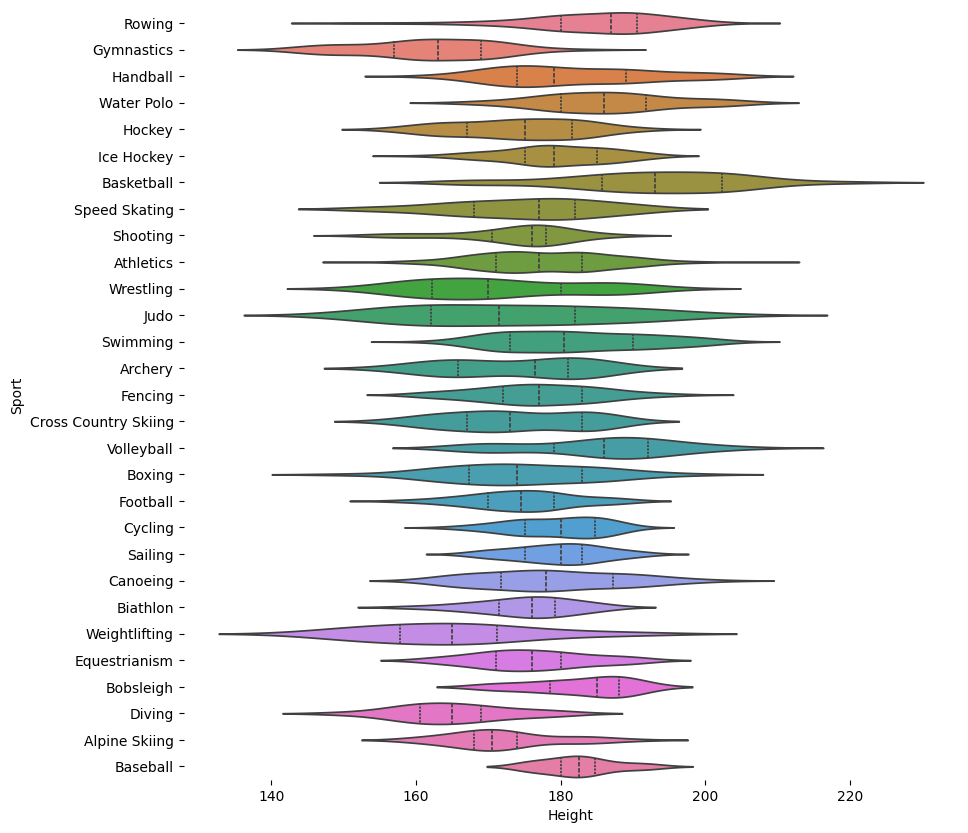

In [65]:
plt.figure(figsize=(10,10))
sns.violinplot(athlete_datayay, x='Height', y='Sport', inner='quart', hue='Sport')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
dag_ad = gv.Digraph(comment='cs_dag')

dag_ad.node('E', 'Sport')
dag_ad.node('D','Height')

dag_ad.edges(['ED'])

##Causal Diagram (non-heirarchical)

This is my causal diagram. It shows that I beleive that the sport played will have some causal effect on the height of the athlete.

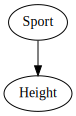

In [ ]:
dag_ad

In [66]:
Sport_encode = pd.Categorical(athlete_datayay['Sport'])
Sport_encode

['Rowing', 'Gymnastics', 'Handball', 'Water Polo', 'Hockey', ..., 'Shooting', 'Rowing', 'Athletics', 'Handball', 'Sailing']
Length: 1818
Categories (29, object): ['Alpine Skiing', 'Archery', 'Athletics', 'Baseball', ..., 'Volleyball',
                          'Water Polo', 'Weightlifting', 'Wrestling']

In [67]:
Sport_idx = Sport_encode.codes
Sport_idx

array([20, 15, 16, ...,  2, 16, 21], dtype=int8)

In [68]:
Sport_coords = {"Sport": Sport_encode.categories}
Sport_coords

{'Sport': Index(['Alpine Skiing', 'Archery', 'Athletics', 'Baseball', 'Basketball',
        'Biathlon', 'Bobsleigh', 'Boxing', 'Canoeing', 'Cross Country Skiing',
        'Cycling', 'Diving', 'Equestrianism', 'Fencing', 'Football',
        'Gymnastics', 'Handball', 'Hockey', 'Ice Hockey', 'Judo', 'Rowing',
        'Sailing', 'Shooting', 'Speed Skating', 'Swimming', 'Volleyball',
        'Water Polo', 'Weightlifting', 'Wrestling'],
       dtype='object')}

##The Model

Here is our non-heirarchical model, which assumes that the sports are independent of each other, which could well be true because it doesn't seem like the sports would have that much effect on each other, but who really knows.

In [ ]:
with pm.Model(coords=Sport_coords) as athlete_nh_model:

    μ = pm.Normal('μ', mu=0, sigma=20,
                  dims="Sport")
    σ = pm.HalfNormal('σ', sigma=20,
                      dims="Sport")


    y = pm.Normal('y',
                  mu = μ[Sport_idx],
                  sigma = σ[Sport_idx],
                  observed=athlete_datayay.Height)


    idata_athlete_nh = pm.sample()

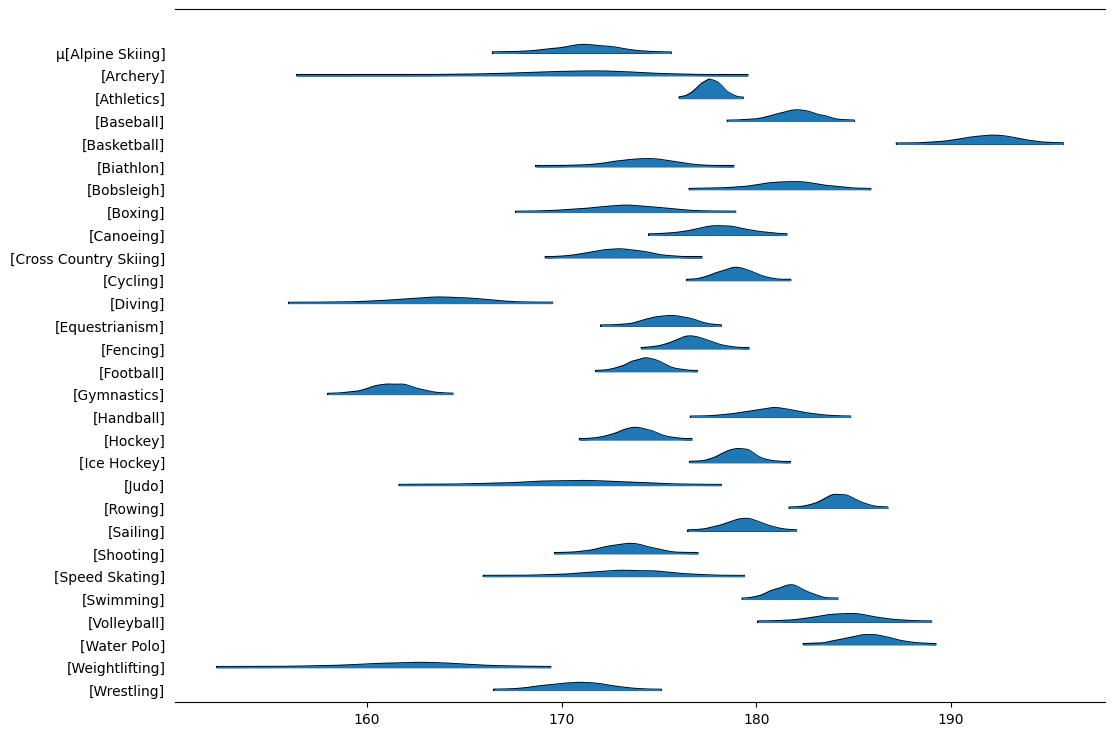

In [70]:
axes = az.plot_forest(idata_athlete_nh, kind="ridgeplot",
                      var_names='μ',
                      combined=True, figsize=(12, 9), hdi_prob=0.997)

In [ ]:
pm.sample_posterior_predictive(idata_athlete_nh, model=athlete_nh_model, extend_inferencedata=True)

##Model Discussion

This model honestly looks pretty great! It doesn't match the ups and downs of the data perfectly, but it does have a similar mean and standard deviation. which is arguably more important. The normal distribution seems to be the right distribution to use in this case.

<Axes: xlabel='y'>

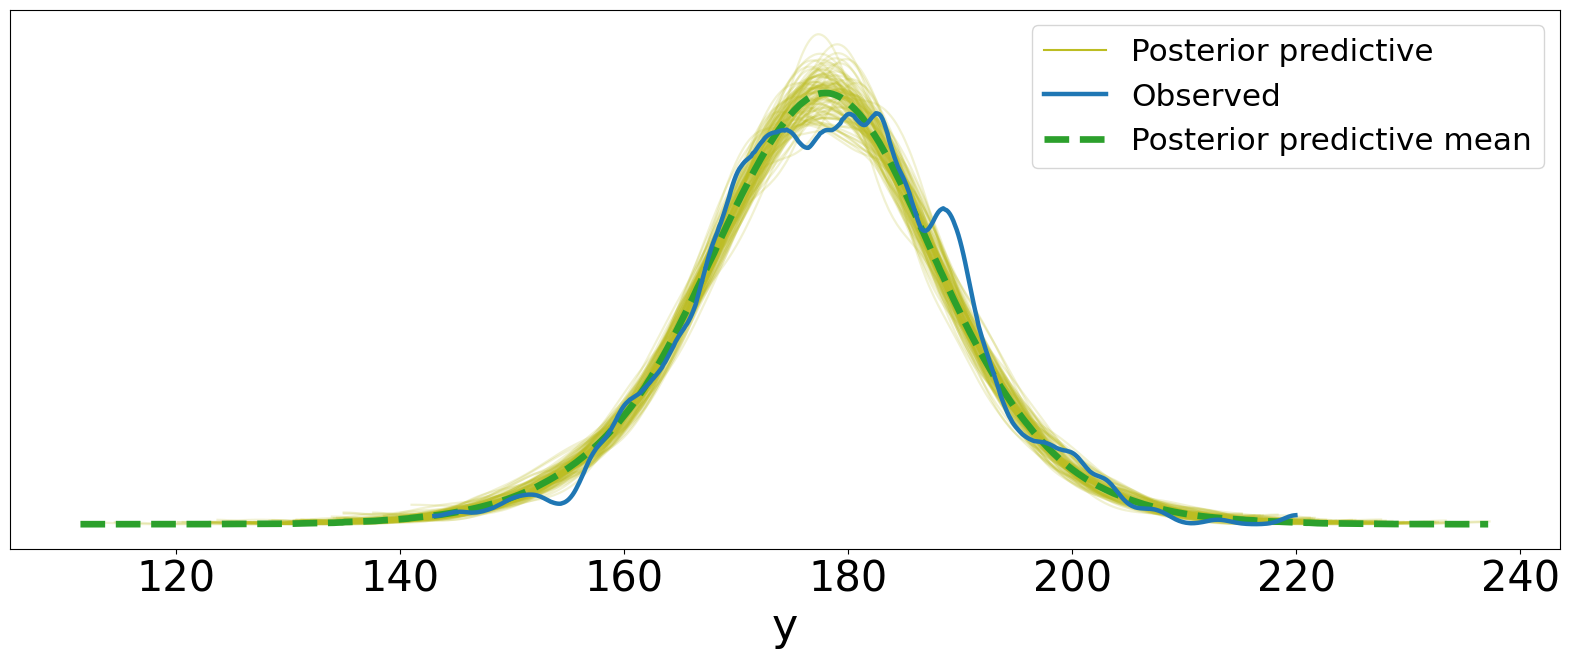

In [97]:
az.plot_ppc(idata_athlete_nh, num_pp_samples=100, figsize=(20, 7), colors=["C58", "C70", "C62"])

##Divergences Discussion

Originally, my model produced hundereds of divergences, which was bad. The ridge plot also showed some weird looking graphs. I concluded that this was due to several sports not having very many players sampled, producing a similar problem as in the goal-keeper example. To solve this, I went back and took out all of the categories with fewer than 15 players and it looked a lot prettier.

##Causal Diagram (heirarchical)

This diagram assumes that the sports are not independent from each other and that they will have effect on the mean height overall.

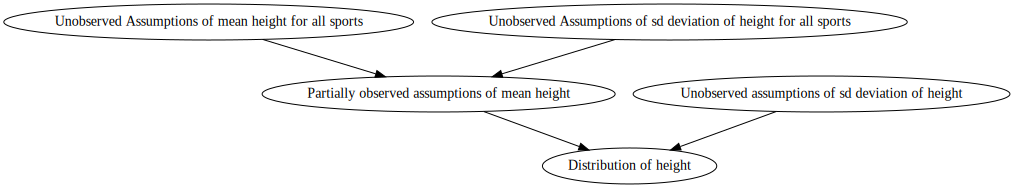

In [24]:
dag_cs_nh = gv.Digraph(comment='cs_dag_nh')

dag_cs_nh.node('t', 'Unobserved Assumptions of mean height for all sports')
dag_cs_nh.node('y','Unobserved Assumptions of sd deviation of height for all sports')

dag_cs_nh.node('M', 'Partially observed assumptions of mean height')
dag_cs_nh.node('S','Unobserved assumptions of sd deviation of height')
dag_cs_nh.node('D','Distribution of height')

dag_cs_nh.edges(['MD','SD', ])
dag_cs_nh.edges(['tM','yM', ])
dag_cs_nh

##The Model (part 2)

This will be our heirarchical model, which will assume that the sports do effect each other. We will compare the two models to see which fits the data better to conclude how independent the categories are.

In [ ]:
with pm.Model(coords=Sport_coords) as athlete_h_model:
    # hyperpriors. Notice how there's no dims argument.
    #this means that the hyperprior is shared across all amino acids
    μ_mu = pm.Normal('μ_mu', mu = 187, sigma = 10)
    μ_sd = pm.HalfNormal('μ_sd', sigma = 100)

    # priors. There is a different prior for each amino acid,
    #but now the μ priors 'talk' to one another through μ_mu and μ_sd
    μ = pm.Normal('μ',
                  mu = μ_mu, # I include the hyperprior in my prior
                  sigma = μ_sd, # I include the hyperprior in my prior
                  dims = "Sport")

    σ = pm.HalfNormal('σ', sigma = 100,
                      dims = "Sport")

    #likelihood; same as before
    y = pm.Normal('y',
                  mu = μ[Sport_idx], #I include the prior in my likelihood
                  sigma = σ[Sport_idx], #I include the prior in my likelihood
                  observed = athlete_datayay.Height)

    #cs for chemshift, h for heirarchical
    idata_athlete_h = pm.sample()

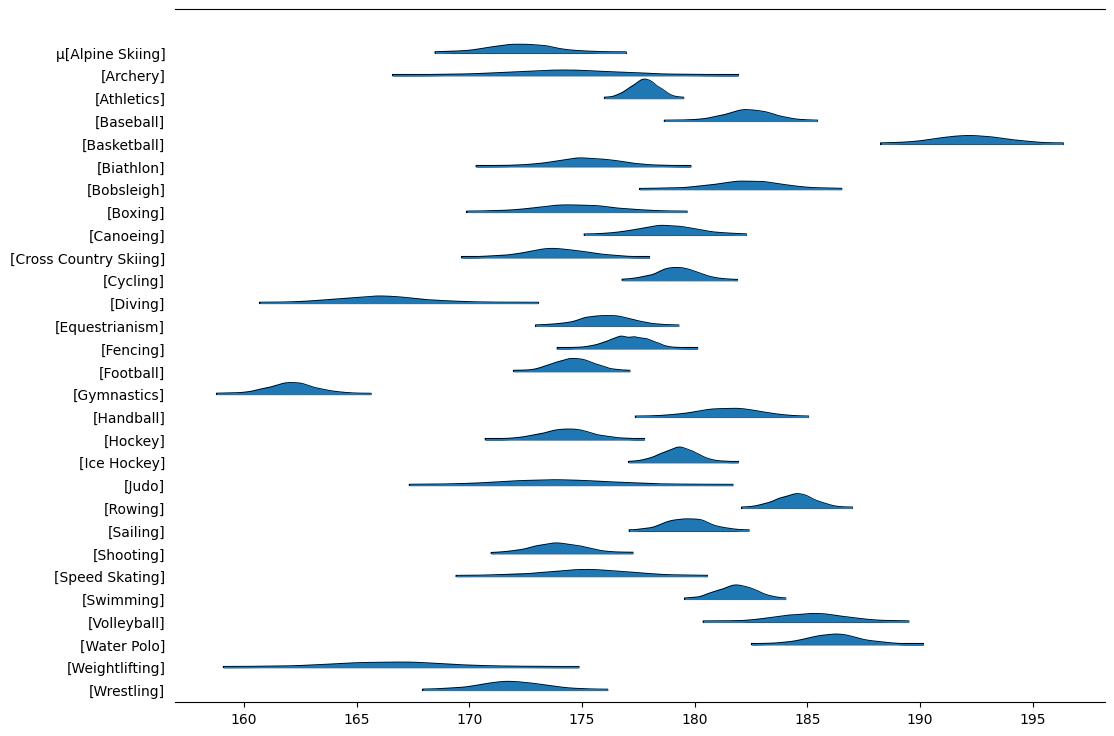

In [78]:
axes = az.plot_forest(idata_athlete_h, kind="ridgeplot",
                      var_names='μ',
                      combined=True, figsize=(12, 9), hdi_prob=0.997)

In [ ]:
pm.sample_posterior_predictive(idata_athlete_h, model=athlete_h_model, extend_inferencedata=True)

##Model Discussion

This model also looks really good! I guess I'm just really good at this class or something.

<Axes: xlabel='y'>

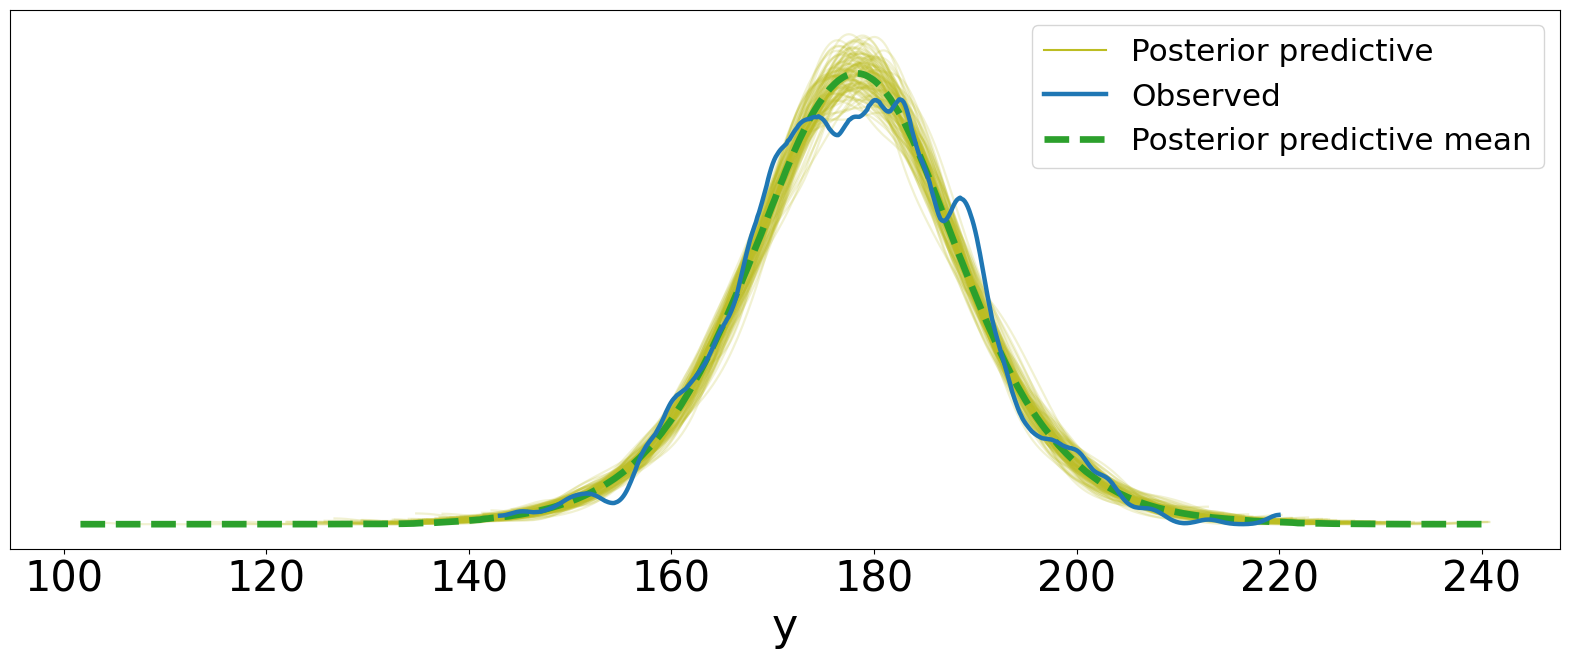

In [96]:
az.plot_ppc(idata_athlete_h, num_pp_samples=100, figsize=(20, 7), colors=["C58", "C70", "C62"])

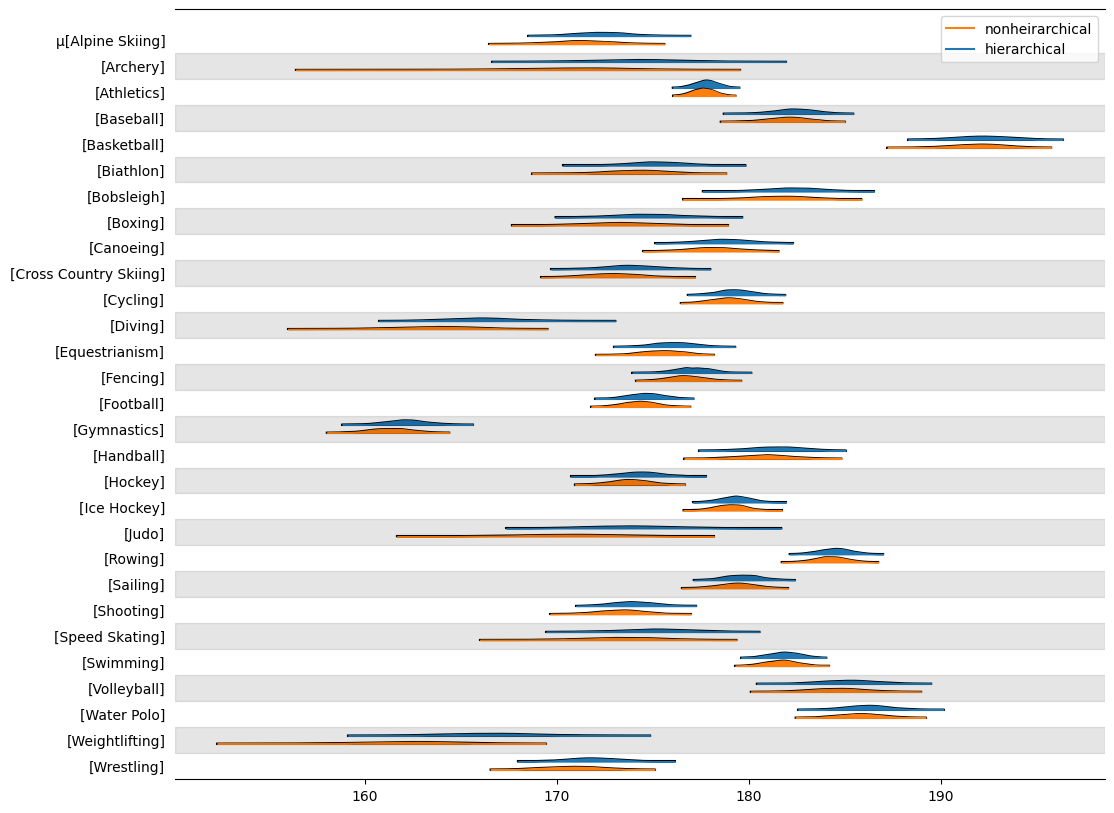

In [79]:
axes = az.plot_forest([idata_athlete_h, idata_athlete_nh], kind="ridgeplot",
                      model_names=['hierarchical', 'nonheirarchical'],
                      var_names='μ', combined=True, figsize=(12, 10),hdi_prob=0.997)

##Conclusion

Both of my models went quite swimmingly and their posterior predictive checks show them to be almost identical in their curve matching accuracy. Upon further comparison though, the heirarchical model is slightly closer to the observed data. This trend is also shown by the above comparison of the ridge plots, in which the heirarchical mean plots have less varience overall than the non-heirarchical. This is interesting, as I orginally predicted that the non-heirarchcial would be more accurate, as I didn't expect that the different sports would have an effect on the athlete height of other sports. But I have been proven wrong, and I accept that with grace and decorum.